In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_recall_curve, roc_curve, mean_absolute_error, mean_squared_error

## 1. Загрузка данных в переменную

In [4]:
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2. Описание и постановка задачи

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Исходя из представленных колонок моджно сделать, что идеальной задачей для такого датасета является классификация - будем прогнозировать значение **'response'** в качестве целевой переменной.

## 3. Предобработка данных

### 3.1 Разбиение даннных на тренировочную и тестовую выборки

In [11]:
X = df.drop('Response', axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2 Проверка пропусков в данных

In [14]:
print(X_train.isnull().sum())
print("\n@@@@@@@@@@@@@@@@@@@@@@@@@\n")
print(X_test.isnull().sum())

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 19
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
dtype: int64

@@@@@@@@@@@@@@@@@@@@@@@@@

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 5
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWin

### 3.3 Трансформация данных

In [20]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## 4. Обучение моделей на тренировочном множестве

In [22]:
# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg_proba = log_reg.predict_proba(X_test)[:, 1]

# Дерево решений
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_pred_tree_proba = tree.predict_proba(X_test)[:, 1]

# K-ближайших соседей
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)[:, 1]

# Случайный лес
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

5. Посчитаем метрики

In [24]:
def print_metrics(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    f1 = f1_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')
    print(f'F1-Score: {f1:.4f}')

# Логистическая регрессия
print("Logistic Regression Metrics:")
print_metrics(y_test, y_pred_log_reg, y_pred_log_reg_proba)

print("\n@@@@@@@@@@@@@@@@@@@@@@@@@\n")

# Дерево решений
print("Decision Tree Metrics:")
print_metrics(y_test, y_pred_tree, y_pred_tree_proba)

print("\n@@@@@@@@@@@@@@@@@@@@@@@@@\n")

# K-ближайших соседей
print("K-Nearest Neighbors Metrics:")
print_metrics(y_test, y_pred_knn, y_pred_knn_proba)

print("\n@@@@@@@@@@@@@@@@@@@@@@@@@\n")

# Случайный лес
print("Random Forest Metrics:")
print_metrics(y_test, y_pred_rf, y_pred_rf_proba)

Logistic Regression Metrics:
Accuracy: 0.8683
ROC-AUC: 0.8349
F1-Score: 0.4486

@@@@@@@@@@@@@@@@@@@@@@@@@

Decision Tree Metrics:
Accuracy: 0.8348
ROC-AUC: 0.6681
F1-Score: 0.2128

@@@@@@@@@@@@@@@@@@@@@@@@@

K-Nearest Neighbors Metrics:
Accuracy: 0.8438
ROC-AUC: 0.7612
F1-Score: 0.2222

@@@@@@@@@@@@@@@@@@@@@@@@@

Random Forest Metrics:
Accuracy: 0.8728
ROC-AUC: 0.8487
F1-Score: 0.3736


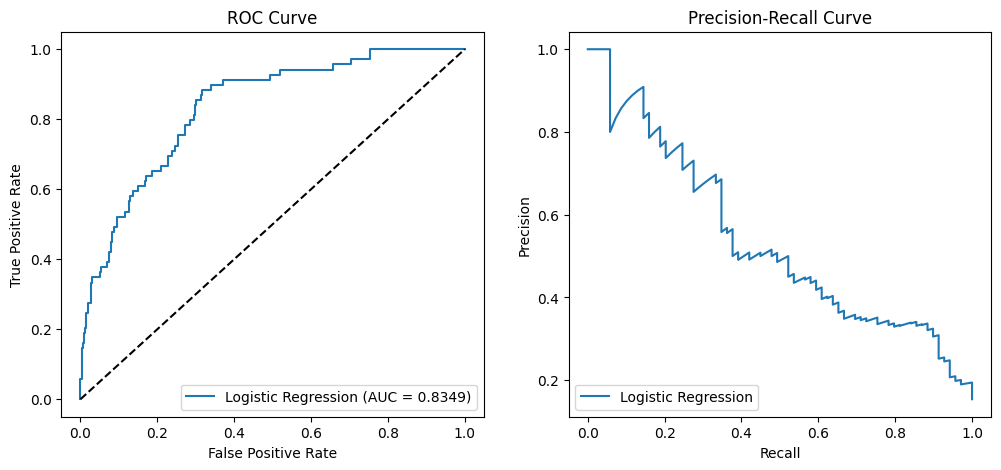

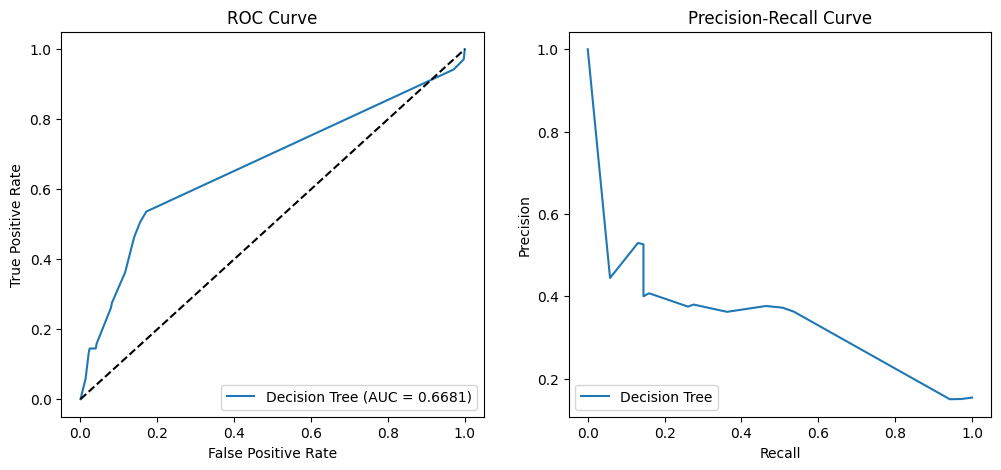

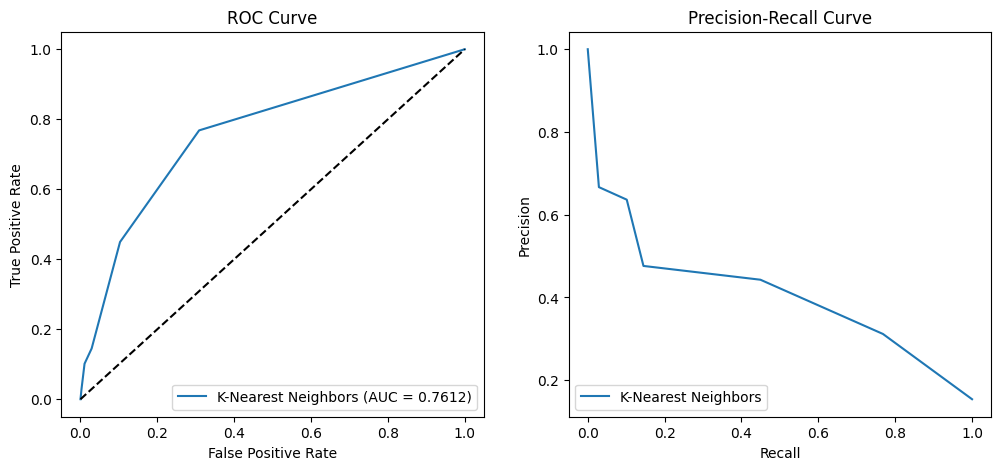

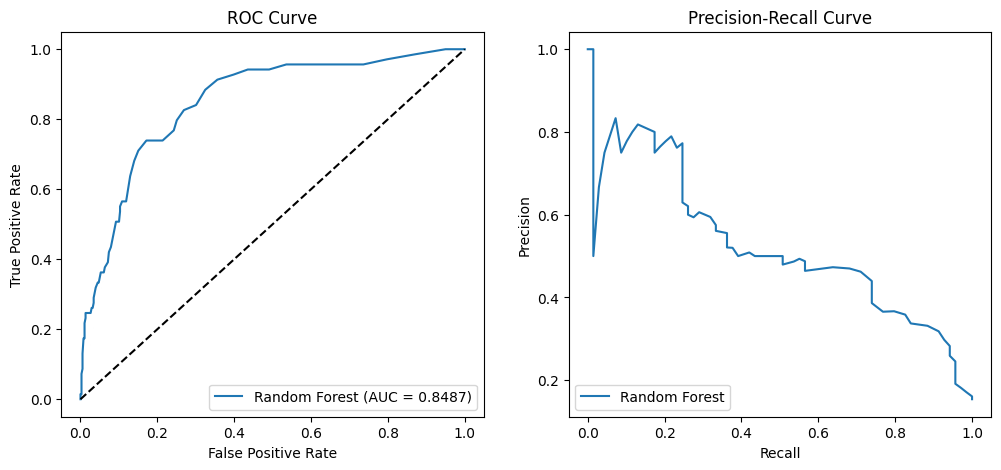

In [26]:
def plot_curves(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred_proba):.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.show()

plot_curves(y_test, y_pred_log_reg_proba, 'Logistic Regression')
plot_curves(y_test, y_pred_tree_proba, 'Decision Tree')
plot_curves(y_test, y_pred_knn_proba, 'K-Nearest Neighbors')
plot_curves(y_test, y_pred_rf_proba, 'Random Forest')

## 6. Сравним метрики

In [28]:
# Функция для печати метрик на тренировочном и тестовом множествах
def print_train_test_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]

    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    print("Train Metrics:")
    print_metrics(y_train, y_train_pred, y_train_pred_proba)

    print("Test Metrics:")
    print_metrics(y_test, y_test_pred, y_test_pred_proba)

# Печать метрик для всех моделей
print("Logistic Regression Train vs Test Metrics")
print_train_test_metrics(log_reg, X_train, y_train, X_test, y_test)

print("\n@@@@@@@@@@@@@@@@@@@@@@@@@\n")


print("Decision Tree Train vs Test Metrics")
print_train_test_metrics(tree, X_train, y_train, X_test, y_test)

print("\n@@@@@@@@@@@@@@@@@@@@@@@@@\n")

print("K-Nearest Neighbors Train vs Test Metrics")
print_train_test_metrics(knn, X_train, y_train, X_test, y_test)

print("\n@@@@@@@@@@@@@@@@@@@@@@@@@\n")

print("Random Forest Train vs Test Metrics")
print_train_test_metrics(rf, X_train, y_train, X_test, y_test)

Logistic Regression Train vs Test Metrics
Train Metrics:
Accuracy: 0.9163
ROC-AUC: 0.9478
F1-Score: 0.6606
Test Metrics:
Accuracy: 0.8683
ROC-AUC: 0.8349
F1-Score: 0.4486

@@@@@@@@@@@@@@@@@@@@@@@@@

Decision Tree Train vs Test Metrics
Train Metrics:
Accuracy: 0.9096
ROC-AUC: 0.8345
F1-Score: 0.5888
Test Metrics:
Accuracy: 0.8348
ROC-AUC: 0.6681
F1-Score: 0.2128

@@@@@@@@@@@@@@@@@@@@@@@@@

K-Nearest Neighbors Train vs Test Metrics
Train Metrics:
Accuracy: 0.9079
ROC-AUC: 0.9397
F1-Score: 0.6024
Test Metrics:
Accuracy: 0.8438
ROC-AUC: 0.7612
F1-Score: 0.2222

@@@@@@@@@@@@@@@@@@@@@@@@@

Random Forest Train vs Test Metrics
Train Metrics:
Accuracy: 1.0000
ROC-AUC: 1.0000
F1-Score: 1.0000
Test Metrics:
Accuracy: 0.8728
ROC-AUC: 0.8487
F1-Score: 0.3736
